<center>
    
# Diagramas de Radiación

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Radiación de un dipolo puntual

Potencia radiada promedio por unidad de ángulo sólido a una distancia muy grande $(r\rightarrow \infty)$:

$$ \frac{dP}{d \Omega} = \frac{c²Z_0}{32\pi²}k⁴|\vec{P}|²sin(\theta) $$

Donde $c$ es la velocidad de la luz, $Z_0$ es la impedancia del vacío, $k$ es el número de onda, $\vec{P}$ es el momento dipolar y $\theta$ es el ángulo entre el momento dipolar y el vector unitario que apunta hacía el punto de medición.

Dado que la expresión solo depende del ángulo $\theta$, es posible asumir un dipolo que apunta en la dirección z positiva, de modo que el ángulo $\theta$ corresponde con el ángulo polar en coordenadas esféricas, hacer que las constantes que acompañan la función seno se hagan $1$ (en unidades de potencia J/s), y gráficar sobre el plano xz.

$$\vec{P} = |\vec{P}| \hat{k} \\$$
$$ \frac{c²Z_0}{32\pi²}k⁴|\vec{P}|² = 1 $$

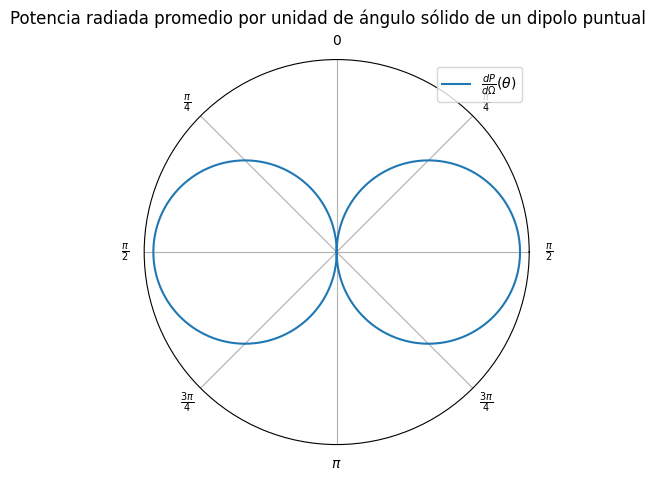

In [2]:
sticks = np.arange(0,2*np.pi, np.pi/4)
sticks_labels = [r'$\frac{\pi}{2}$', r'$\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{3\pi}{4}$']

theta = np.linspace(-np.pi/2, 3*np.pi/2, 1000)

fig = plt.figure(figsize=(7,5))
fig.suptitle(r'Potencia radiada promedio por unidad de ángulo sólido de un dipolo puntual')

ax1 = fig.add_subplot(1,1,1, projection='polar')
ax1.plot(theta, np.sin(np.abs(theta-np.pi/2)), label = r'$\frac{dP}{d\Omega}(\theta)$')
ax1.set_xticks(sticks, sticks_labels)
ax1.set_yticks([])
ax1.legend()

plt.show()

## Antena de dipolo de longitud finita

Sea una antena de dipolo de longitud $d$ delgada, ubicado a lo largo de la dirección z entre $(z=-d/2)$ y $(z=d/2)$ y atravesada por una corriente sinusoidal.

### Potencial vector

$$ \vec{A}(\vec{x}) = \frac{\mu_0Ie^{ikr}}{2\pi kr} \left\{ \frac{cos\left(\frac{kdcos\theta}{2}\right)-cos\left(\frac{k}{2}\right)}{sin²\theta
}\right\}\hat{k}$$

### Radiación

Potencia radiada promedio por unidad de ángulo sólido a una distancia muy grande $(r\rightarrow \infty)$:

$$ \frac{dP}{d\Omega} = \frac{Z_0I²}{8\pi²} \left[\frac{cos\left(\frac{kdcos\theta}{2}\right)-cos\left(\frac{kd}{2}\right)}{sin\theta}\right]^{2}$$

Por comodidad al gráficar se hace toda la parte que no depende de $\theta$ igual a 1. Gracias a la simetría asimutal se grafica el diagrama de radiación en el plano xz.

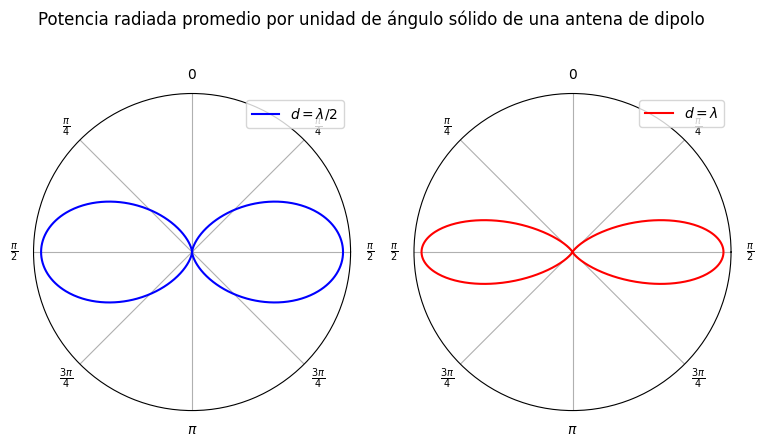

In [3]:
lambda_ = 1
k = 2*np.pi/lambda_

#Potencia
def dP(theta, d):
    return ((np.cos(k*d*np.cos(theta)/2)-np.cos(k*d/2))/np.sin(theta))**2

dP_1 = lambda theta: dP(theta, lambda_/2)
dP_2 = lambda theta: dP(theta, lambda_)

theta = np.linspace(-np.pi/2, 3*np.pi/2, 1000)

fig = plt.figure(figsize=(9,5))
fig.suptitle(r'Potencia radiada promedio por unidad de ángulo sólido de una antena de dipolo')

ax1 = fig.add_subplot(1,2,1, projection='polar')
ax1.plot(theta, dP_1(np.abs(theta-np.pi/2)), 'b', label = r'$d = \lambda/2$')
ax1.set_xticks(sticks, sticks_labels)
ax1.set_yticks([])
ax1.legend()

ax2 = fig.add_subplot(1,2,2, projection='polar')
ax2.plot(theta, dP_2(np.abs(theta-np.pi/2)), 'r', label = r'$d = \lambda$')
ax2.set_xticks(sticks, sticks_labels)
ax2.set_yticks([])
ax2.legend()

plt.show()

## Dipolos eléctrico y magnético perpendiculares con desface 

Sea una antena formada por un dipolo eléctrico de magnitud P paralelo al eje x y un dipolo magnético de mágnitud P/c paralelo al eje  y, armónicos y con un desface de $\delta$.
### Radiación
Potencia media radiada por unidad de ángulo sólido a una distancia muy grande $(r\rightarrow\infty)$:

$$ \frac{dP}{d\Omega} = \frac{c²Z_0k⁴}{32\pi²}P²\left[ cos²\theta(1+sin(2\phi)cos\delta) + cos\delta(1-sin(2\phi)) \right] $$

Para graficar se hace la parte constante igual a 1:

$$ \frac{c²Z_0k⁴}{32\pi²}P² = 1 $$

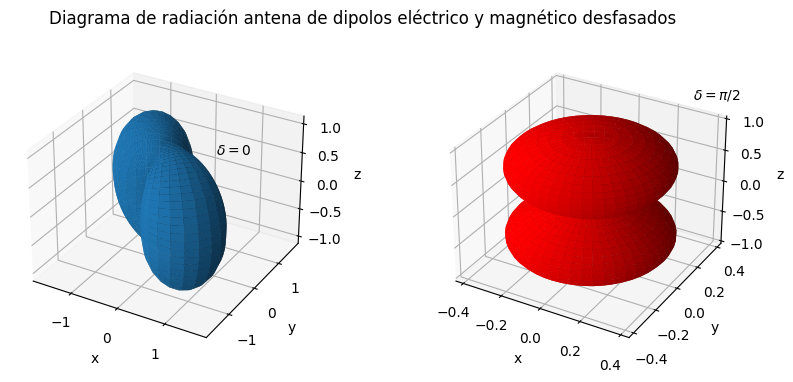

In [54]:
def dP(theta, phi, delta):
    return (np.cos(theta)**2)*(1+np.sin(2*phi)*np.cos(delta)) + np.cos(delta)*(1-np.sin(2*phi))

theta = np.linspace(0, np.pi)
phi = np.linspace(0, 2*np.pi)
theta, phi = np.meshgrid(theta, phi)
r1 = dP(theta, phi, 0)
r2 = dP(theta, phi, np.pi/2)

x1 = r*np.sin(theta)*np.cos(phi)
y1 = r*np.sin(theta)*np.sin(phi)
z1 = r*np.cos(theta)

x2 = r2*np.sin(theta)*np.cos(phi)
y2 = r2*np.sin(theta)*np.sin(phi)
z2 = r2*np.cos(theta)

fig = plt.figure(figsize=(10,4))
fig.suptitle('Diagrama de radiación antena de dipolos eléctrico y magnético desfasados')

ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.plot_surface(x1,y1,z1, label=r'$\delta = 0$')
ax1.set_zlabel('z')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.text(1,0,1,r'$\delta = 0$')

ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.plot_surface(x2,y2,z2, color='red', label=r'$\delta = \frac{\pi}{2}$')
ax2.set_zlabel('z')
ax2.set_ylabel('y')
ax2.set_xlabel('x')
ax2.text(0,1,.2,r'$\delta = \pi/2$')

plt.show()

## Distribución superficial de corriente

Sea una esfera de radio a con distribución supericial de corriente:

$$ \vec{J_s} = J_0cos(2\theta)\hat{\theta} $$

Potencia media radiada por unidad de ángulo sólido por expansión multipolar:

$$ \vec{P} = \frac{iJ_0\pi²a²}{2\omega}\hat{k} $$

$$ \vec{m} = 0 $$

$$ \vec{\vec{Q}} = 0 $$

La expansión a segundo ordén es el diagrama de radiación de un dipolo eléctrico:

$$ \frac{dP}{d\Omega} = \frac{c²Z_0}{32\pi²}k⁴|\vec{P}|²sin²\theta $$

Fijando las constantes con el fin de graficar:

$$ \frac{c²Z_0}{32\pi²}k⁴|\vec{P}|² = 1$$

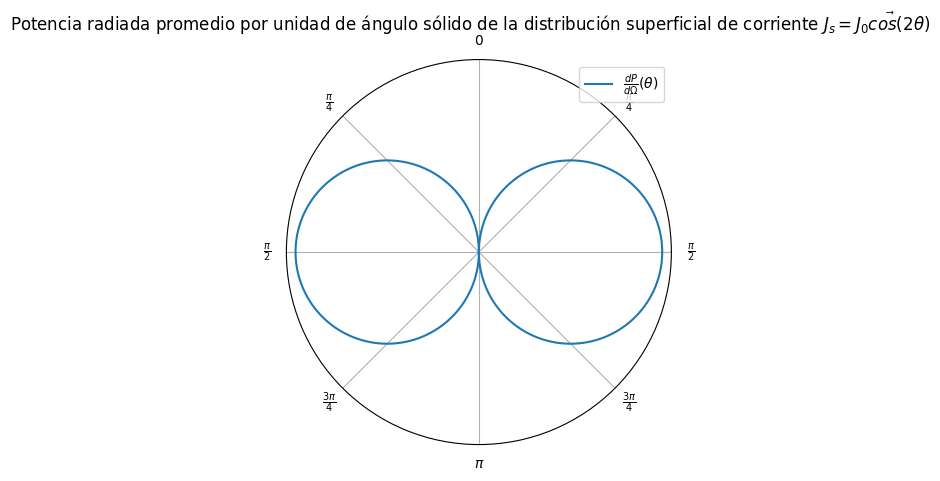

In [55]:
sticks = np.arange(0,2*np.pi, np.pi/4)
sticks_labels = [r'$\frac{\pi}{2}$', r'$\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{3\pi}{4}$']

theta = np.linspace(-np.pi/2, 3*np.pi/2, 1000)

fig = plt.figure(figsize=(7,5))
fig.suptitle(r'Potencia radiada promedio por unidad de ángulo sólido de la distribución superficial de corriente $\vec{J_s=J_0cos(2\theta)}$')

ax1 = fig.add_subplot(1,1,1, projection='polar')
ax1.plot(theta, np.sin(np.abs(theta-np.pi/2)), label = r'$\frac{dP}{d\Omega}(\theta)$')
ax1.set_xticks(sticks, sticks_labels)
ax1.set_yticks([])
ax1.legend()

plt.show()